In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Raw Data 1 : Measured Time (in seconds) Taken to Roll Down Distance Intervals 1 - 5
# Measured using the PASCO Interface
timeInterval1 = np.array([1.264, 1.240, 1.248, 1.260, 1.265])
timeInterval2 = np.array([1.846, 1.860, 1.854, 1.871, 1.867])
timeInterval3 = np.array([2.357, 2.338, 2.338, 2.341, 2.341])
timeInterval4 = np.array([2.727, 2.768, 2.789, 2.737, 2.780])
timeInterval5 = np.array([3.3039, 3.038, 3.034, 3.033, 3.063])

raw = {'x1' : timeInterval1, 'x2' : timeInterval2, 'x3' : timeInterval3, 'x4' : timeInterval4, 'x5' : timeInterval5}
rawData = pd.DataFrame(data=raw)

# Grouping
allTimeIntervals = np.array([timeInterval1, timeInterval2, timeInterval3, timeInterval4, timeInterval5])

# Raw Data 2 : Distance Intervals
distancePoints = np.array([9.80, 19.60, 29.40, 39.2, 49.00])

# Calculating the Mean of the Repeated Time Measurements
meanTimes = np.mean(allTimeIntervals, axis=1)

# Calculating the Standard Error in the Mean for each time mean. 
def SDOM(array):
    return np.std(array, ddof=1) / np.sqrt(len(array)) # delta degree of freedom (ddof) = 1 because we want small sigma_(N - 1)

SDOMs = [SDOM(a) for a in allTimeIntervals]

# Doing this manually is less of a hassle because of our convention of what happens if the decimal is a 5 lol
SDOMsOneSigFig = [0.005, 0.004, 0.003, 0.01, 0.05]

cleanedData = pd.DataFrame({ 'x_i' : distancePoints, 't_i' : meanTimes, 'alpha' : SDOMsOneSigFig })




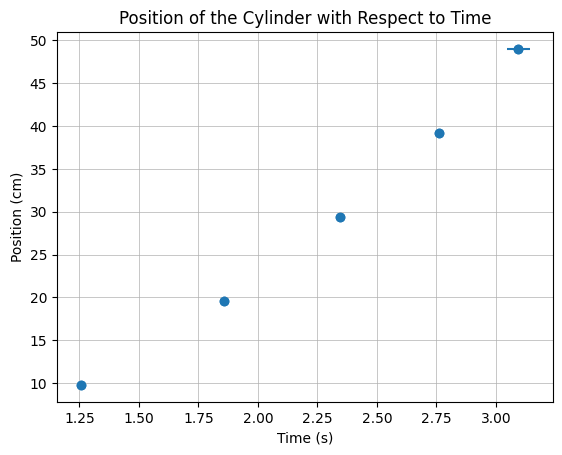

In [3]:
plt.scatter(meanTimes, distancePoints)
plt.grid(linewidth=0.5)

plt.errorbar(meanTimes, distancePoints, xerr = SDOMsOneSigFig, fmt='o')

plt.title("Position of the Cylinder with Respect to Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (cm)")

plt.show()

In [4]:
# For the latex report
print(rawData.to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & x1 & x2 & x3 & x4 & x5 \\
\midrule
0 & 1.264000 & 1.846000 & 2.357000 & 2.727000 & 3.303900 \\
1 & 1.240000 & 1.860000 & 2.338000 & 2.768000 & 3.038000 \\
2 & 1.248000 & 1.854000 & 2.338000 & 2.789000 & 3.034000 \\
3 & 1.260000 & 1.871000 & 2.341000 & 2.737000 & 3.033000 \\
4 & 1.265000 & 1.867000 & 2.341000 & 2.780000 & 3.063000 \\
\bottomrule
\end{tabular}



In [5]:
cleanedData.head()
print(cleanedData.to_latex(float_format="{:.3f}".format))

\begin{tabular}{lrrr}
\toprule
 & x_i & t_i & alpha \\
\midrule
0 & 9.800 & 1.255 & 0.005 \\
1 & 19.600 & 1.860 & 0.004 \\
2 & 29.400 & 2.343 & 0.003 \\
3 & 39.200 & 2.760 & 0.010 \\
4 & 49.000 & 3.094 & 0.050 \\
\bottomrule
\end{tabular}



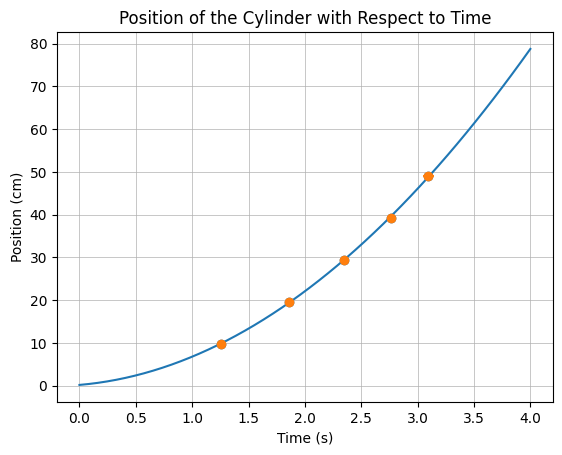

       2
4.347 x + 2.262 x + 0.1862


<Figure size 640x480 with 0 Axes>

In [13]:
# Performing quadratic regression
# Why quadratic ? Because we know that the true relationship between position and time is quadratic
# x(t) = x_0 + v_0t + 0.5at^2

# Polynomial fit with degree 2
model = np.poly1d(np.polyfit(meanTimes, distancePoints, 2))

# Add the fitted line to the graph
polyline = np.linspace(0, 4, 50)

plt.scatter(meanTimes, distancePoints)
plt.grid(linewidth=0.5)

plt.plot(polyline, model(polyline))
plt.errorbar(meanTimes, distancePoints, xerr = SDOMsOneSigFig, fmt='o')

plt.title("Position of the Cylinder with Respect to Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (cm)")

plt.show()

# As we can see, the modeled line is a good fit over our experimental data points
# In accord with the theory.

# We can then print our fitted line to get our x(t) equation
print(model)
plt.savefig('fig2.jpg')



In [7]:
# We perform differentiation to obtain the rate of change of x with respect to t
# Our equation for v(t), effectively
# x(t) = 4.347t^2 + 2.262t + 0.1862

x_t = [4.347, 2.262, 0.1862]
v_t = np.polyder(x_t)

print(f"v(t) = {v_t[0]} * m/s^2 * t + {v_t[1]} m/s")

v(t) = 8.694 * m/s^2 * t + 2.262 m/s


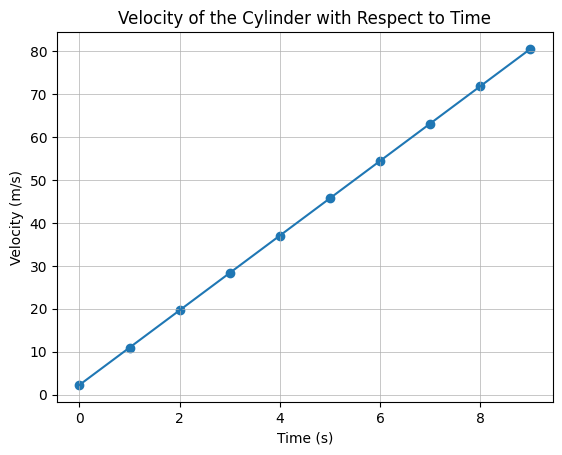

<Figure size 640x480 with 0 Axes>

In [14]:
# We can then plot this curve for visualization 
timePoints = np.array([x for x in range(10)])
velocityPoints = np.array([y*v_t[0] + v_t[1] for y in range(10)])

plt.scatter(timePoints, velocityPoints)
plt.plot(timePoints, velocityPoints)

plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity of the Cylinder with Respect to Time")
plt.grid(linewidth=0.5)

plt.show()
plt.savefig('fig3.jpg')

In [9]:
# We differentiate once more to obtain rate of change of speed with respect to time 
# i.e acceleration 

a_t = np.polyder(v_t)
print(f"a(t) = {a_t[0]} m/s^2")

a(t) = 8.694 m/s^2


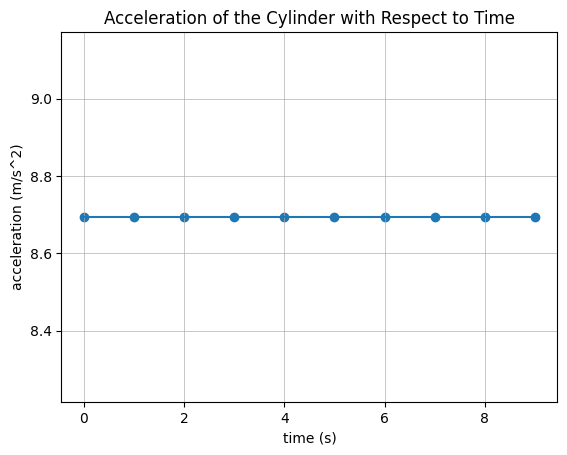

<Figure size 640x480 with 0 Axes>

In [15]:
# And a plot 
accelerationPoints = np.array([a_t[0] for y in range(10)])

plt.plot(timePoints, accelerationPoints)
plt.scatter(timePoints, accelerationPoints)

plt.xlabel("time (s)")
plt.ylabel("acceleration (m/s^2)")
plt.title("Acceleration of the Cylinder with Respect to Time")
plt.grid(linewidth=0.5)

plt.show()
plt.savefig('fig4.jpg')

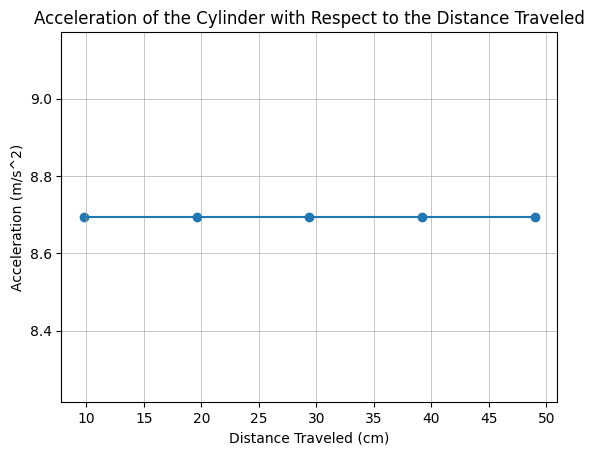

<Figure size 640x480 with 0 Axes>

In [16]:
# Because each point in time corresponds to a position on the slop 
# We can plot the acceleration against the position to show that the acceleration is constant in space

plt.scatter(distancePoints, accelerationPoints[:5])
plt.plot(distancePoints, accelerationPoints[:5])

plt.title("Acceleration of the Cylinder with Respect to the Distance Traveled")
plt.xlabel("Distance Traveled (cm)")
plt.ylabel("Acceleration (m/s^2)")

plt.grid(linewidth=0.5)

plt.show()
plt.savefig('fig5.jpg')



In [12]:
# Some error analysis
# Random Errors
""" The signature of random errors is the spread of repeated measurements over a range. 
The best estimate of the true value of ameasurement is the mean

For each distance interval x_1 to x_5, 5 time measurements were taken 
So for each distance interval, the estimated true value of the time shall be 
            the mean of the t's 
            
Each t_i_mean must then be reported with a precision :
    
    rough-and-ready approach : t_i_mean - d_max <= t_i_mean <= t_i_mean + d_max 
    where d_max is the maximum spread around the mean.
    standard deviation is then 2/3 * d_max (maximum deviation)
    
    
    statistical approach : a measure of the random uncertainty that depends on all the measurements
    that is, the standard deviation.
    
                sigma_(N - 1) = sqrt((1/N - 1) * sumFromOneToN(d_i^2))
                where d_i = t_i - t_mean (deviation from the mean of the ith data point)
                 
    
    
    The standard error in the mean (sigma_(N - 1))/sqrt(N) is the uncertainty in the position of the mean 
    
    Then the results are reported as t_mean ± (sigma_(N - 1))/sqrt(N)
    From this, we must understand that 2/3 of the measurements on t will lie in the interval.
    
    The error is quoted to one sig. fig. -> we mathch the digits in the reported mean. 
    
    What happens to our precision when we differentiate, and how do we report the final result 
    of the acceleration ?

"""







# Repeated measurements as a means to determine the precision of a measurement

# Standard Error in the Mean

# Significant figures

# Combining experimental results: Error weighted averaging


" The signature of random errors is the spread of repeated measurements over a range. \nThe best estimate of the true value of ameasurement is the mean\n\nFor each distance interval x_1 to x_5, 5 time measurements were taken \nSo for each distance interval, the estimated true value of the time shall be \n            the mean of the t's \n            \nEach t_i_mean must then be reported with a precision :\n    \n    rough-and-ready approach : t_i_mean - d_max <= t_i_mean <= t_i_mean + d_max \n    where d_max is the maximum spread around the mean.\n    standard deviation is then 2/3 * d_max (maximum deviation)\n    \n    \n    statistical approach : a measure of the random uncertainty that depends on all the measurements\n    that is, the standard deviation.\n    \n                sigma_(N - 1) = sqrt((1/N - 1) * sumFromOneToN(d_i^2))\n                where d_i = t_i - t_mean (deviation from the mean of the ith data point)\n                 \n    \n    \n    The standard error in the me